#  Crime dataset

##  KMeans Clustering 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [42]:
crime = pd.read_csv("crime_data.csv")

###  Normalize the dataset 

In [43]:
norm = MinMaxScaler().fit_transform(crime.iloc[:,1:])
norm

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

###  Optimal number of clusters using elbow method 

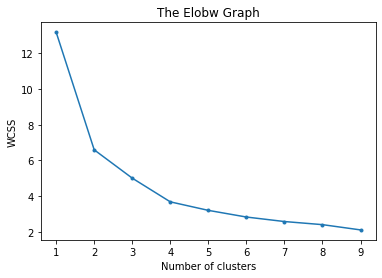

In [44]:
WCSS = []
for i in range(1,10):
    k_value = KMeans(n_clusters=i)
    k_value.fit(norm)
    WCSS.append(k_value.inertia_)
plt.plot(range(1,10), WCSS, marker = ".")
plt.title('The Elobw Graph')  
plt.xlabel('Number of clusters')  
plt.ylabel('WCSS')  
plt.show()

###   KMean Clustering Model 

In [60]:
kvalues = KMeans(n_clusters=4).fit_predict(norm)
kvalues

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 0, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0])

In [61]:
new_clust = pd.Series(kvalues)
crime["cluster"] = new_clust
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,2


In [62]:
crime.iloc[:,1:5].groupby(crime.cluster).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.852941,141.176471,73.647059,19.335294
1,3.600000,78.538462,52.076923,12.176923
2,13.937500,243.625000,53.750000,21.412500
3,10.966667,264.000000,76.500000,33.608333


###  Visualization 

Text(0.5, 1.0, 'cluster using KMeans')

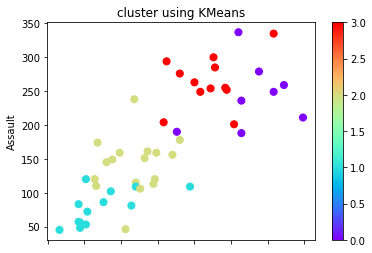

In [58]:
crime.plot(x="Murder", y="Assault", c = kvalues, kind="scatter", s= 50, cmap = "rainbow")
plt.title("cluster using KMeans")

##   Inference 

###  The countries belongs to cluster 1 (3.6,78.5,52.07,12.17) have less crime rate comapred to others 